# 퍼셉트론(perceptron)

- 인공신경망의 한 종류로, 가장 오래되고 단순한 형태의 판별 함수 기반 예측 모형(discriminant function based predition model) 중 하나.


- 동물의 신경(neuron) 구조에 기반한 퍼셉트론의 아이디어를 고안함


- 가장 간단한 형태의 피드포워드(Feedforward) 네트워크 선형 분류기로도 볼 수 있다.


- 동작하는 방식은 각 노드의 가중치와 입력치를 곱한 것을 모두 합한 값(가중합)이 활성함수에 의해 판단되는데, 그 값이 임계치(보통 0)보다 크면 뉴런이 활성화되고 결과값으로 1을 출력. 뉴런이 활성화되지 않으면 결과값으로 -1을 출력한다


- 위를 어렵게 표현하면 퍼셉트론은 입력 $x = (1, x_1, \cdots, x_m)$에 대해 1 또는 -1의 값을 가지는  $y$를 출력하는 비선형 함수이다. 1을 포함하는 입력 요소 $x_i$에 대해 가중치 $w_i$를 곱한 후 이 값이 활성화 함수 (activation function) $f(z)$를 지나면 출력 $y$가 생성된다.

$$
y = f(w^Tx)
$$

- 단층 퍼셉트론은 XOR 연산이 불가능하지만, 다층 퍼셉트론은 XOR연산이 가능함

cf) XOR(exclusive or) : 2개의 주어진 명제 가운데 1개만 참일 경우를 판단하는 논리 연산으로. 비트간 배타적 논리합을 뜻함


퍼셉트론은 활성화 함수로 다음과 같은 Heaviside step function 을 가진다.

$$ y = f(z) = \begin{cases} -1, & z < 0, \\ 1, & z \ge 0 \end{cases}  $$

따라서 퍼셉트론은 $w^Tx$라는 판별함수를 가지는 판별 기반 모형이다.

<img src="https://datascienceschool.net/upfiles/78cccb1e0a514566916eb656c85ea397.png" style="width:60%; margin: 0 auto 0 auto;">


<img src="https://datascienceschool.net/upfiles/41974f50e89249aebe059fb4d60310aa.png" style="width:60%; margin: 0 auto 0 auto;">

## 퍼셉트론 손실 함수

퍼셉트론은 독립 변수 x로부터 종속 변수 y를 예측하는 **예측모형**이므로 예측 오차(손실, loss)를 최소화하는 가중치를 계산해야함.

일반적으로 예측 오차는 손실함수의 합으로 나타냄($L(\hat{y}, y) = -(\hat{y} - y)^2 $꼴) 하지만 퍼셉트론의 경우는 다음과 같은 손실 함수를 사용함

$$
L(\hat{y}, y) = \max(0,-\hat{y}y)
$$

$$
E(w) = \sum_i \max(0,-\hat{y}y) = \sum_i \max(0,-w^Tx_i y_i)
$$


여기서 $ w^T,x 는 벡터이고, y는 스칼라임 $

(벡터 : 값을 여러개 가지고 있음, 스칼라 : 값을 하나만 가지고 있음)


## 가중치 계산

$E(w)$를 최소화하는 $w$를 찾기 위해 $E(w)$를 $w$로 미분하여 gradient를 구하면 다음과 같다.

$$
\dfrac{dE}{dw} = - \sum_i x_i y_i
$$


gradient descent 방법을 사용하면 다음과 같이 $w$를 구할 수 있다.


$$
\begin{eqnarray}
w_{k+1} 
&=& w_{k} + \eta_k \sum_{i=1}^N x_i y_i \\
\end{eqnarray}
$$

여기에서 $eta (\eta_k)$는 step size 또는 learning rate 이라고 부른다.



## SGD (Stochastic Gradient descent)

퍼셉트론의 경우 일반적인 gradient descent 방법이 아닌 SGD 최적화 방법을 사용함.


SGD 최적화 방법은 정확한 gradient 인 $\dfrac{dE}{dw} = - \sum_i x_i y_i$ 대신 일부 표본 데이터만 사용한 gradient의 추정치를 이용하는 방법이다.  gradient 추정에 사용하는 표본 데이터의 갯수를 minibatch size 라고 하는데 가장 퍼셉트론은 가장 극단적인 경우로 minibatch size = 1 을 사용한다. 즉, 한번에 하나의 표본 데이터만을 이용하여 가중치를 조정한다.

$$
\begin{eqnarray}
w_{k+1} 
&=& w_{k} + \eta_k  x_i y_i \\
\end{eqnarray}
$$

이 식에서 $i$는 매 회 임의의 표본을 선택한다.

## Scikit-Learn의 퍼셉트론 구현

SKlearn에서 단순 퍼셉트론 모형인 perceptron 클래스와 다양한 옵션 인수를 제공하는 SGDClassfier 클래스를 제공함(단순한 퍼셉트론은 거의 사용하지 않음)

SGDClassfier 클래스에서 제공하는 인수 설명
* loss : ‘hinge’, ‘log’, ‘modified_huber’, ‘squared_hinge’, ‘perceptron’, ‘squared_loss’, ‘huber’, ‘epsilon_insensitive’,  ‘squared_epsilon_insensitive’
  * 손실 함수 

* penalty : ‘none’, ‘l2’, ‘l1’, or ‘elasticnet’
  * 정규화 조건

* alpha, l1_ratio
  * 정규화 가중치
 
* n_iter : 
  * 최적화를 위한 반복 횟수

* eta0 : 
  * learning rate $\eta$


In [6]:
from sklearn.datasets import load_iris
iris = load_iris()


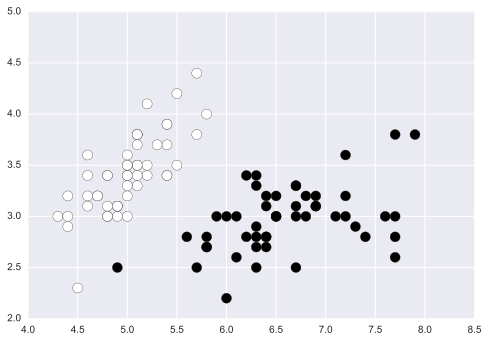

In [13]:
idx = np.in1d(iris.target, [0, 2]) # np.in1d : iris.target에 [0, 2]이 있으면 T, 
#                                 없으면 F, invert=True하면 역으로 됨)
X = iris.data[idx, 0:2] # 앞에 2개를 X로
y = iris.target[idx] # idx가 True인 값을 y로

plt.scatter(X[:, 0], X[:, 1], c=y, s=100)
plt.show()

In [14]:
from sklearn.linear_model import Perceptron # perceptron 실시

def plot_perceptron(n):
    model = Perceptron(n_iter=n, eta0=0.1, random_state=1).fit(X, y) # n만큼 이터레이션함(n이 적으면 이터레이션안됨)
    XX_min = X[:, 0].min() - 1; XX_max = X[:, 0].max() + 1;
    YY_min = X[:, 1].min() - 1; YY_max = X[:, 1].max() + 1;
    XX, YY = np.meshgrid(np.linspace(XX_min, XX_max, 1000), np.linspace(YY_min, YY_max, 1000))
    ZZ = model.predict(np.c_[XX.ravel(), YY.ravel()]).reshape(XX.shape)
    cmap = mpl.colors.ListedColormap(sns.color_palette("Set2"))
    plt.contourf(XX, YY, ZZ, cmap=cmap)
    plt.scatter(X[:, 0], X[:, 1], s=50, linewidth=2, c=y, cmap=cmap)
    plt.xlim(XX_min, XX_max)
    plt.ylim(YY_min, YY_max)
    plt.grid(False)


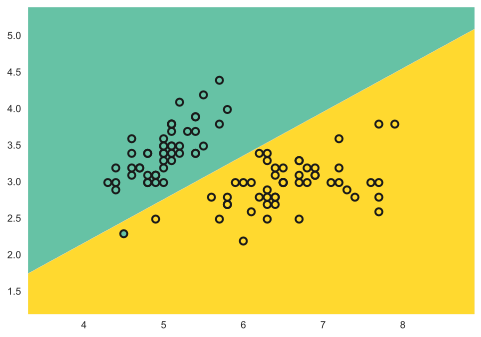

In [15]:
plot_perceptron(3)

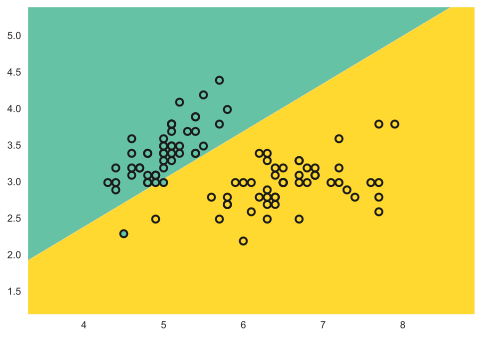

In [16]:
plot_perceptron(5)

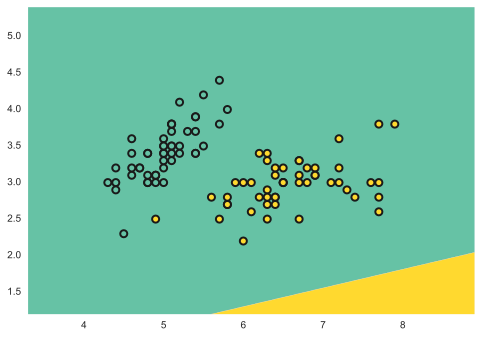

In [17]:
from ipywidgets import widgets
widgets.interact(plot_perceptron, n=widgets.IntSlider(min=1,max=100,step=1,value=1)); # 아이파이썬 위젯 생성

In [18]:
from sklearn.metrics import confusion_matrix, classification_report

model = Perceptron(n_iter=500, eta0=0.01, random_state=1).fit(X, y)
confusion_matrix(y, model.predict(X))

array([[50,  0],
       [ 0, 50]])

In [19]:
from sklearn.linear_model import SGDClassifier # 모델 수정

def plot_sgd(n):
    model = SGDClassifier(loss="hinge", n_iter=n, random_state=1).fit(X, y)
    XX_min = X[:, 0].min() - 1; XX_max = X[:, 0].max() + 1;
    YY_min = X[:, 1].min() - 1; YY_max = X[:, 1].max() + 1;
    XX, YY = np.meshgrid(np.linspace(XX_min, XX_max, 1000), np.linspace(YY_min, YY_max, 1000))
    ZZ = model.predict(np.c_[XX.ravel(), YY.ravel()]).reshape(XX.shape)
    cmap = mpl.colors.ListedColormap(sns.color_palette("Set2"))
    plt.contourf(XX, YY, ZZ, cmap=cmap)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, linewidth=2, cmap=cmap)
    plt.xlim(XX_min, XX_max)
    plt.ylim(YY_min, YY_max)    
    plt.grid(False)

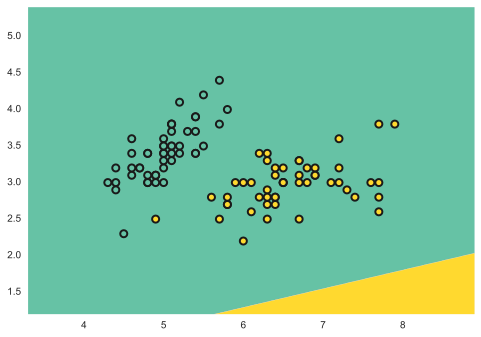

In [20]:
plot_sgd(1)

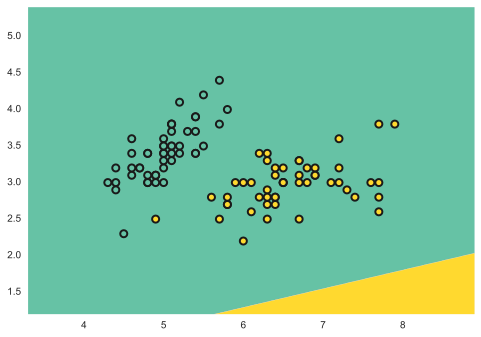

In [21]:
from ipywidgets import widgets
widgets.interact(plot_sgd, n=widgets.IntSlider(min=1,max=100,step=1,value=1));